## This notebook makes the plots for Figure 4 and associated supplementary figures S9 and S10

In [1]:
#packages
import mat73
import os
from scipy.io import loadmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy
import importlib
#from skimage import io
from matplotlib import cm
import matplotlib.colors as mcolors
import imageio
import statsmodels.stats.multitest
from tqdm import tqdm
from matplotlib import gridspec
#import svglib
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix

#import methods
from Figure4_methods_boutonTuning import *
from Figure4_methods_retinotopyComparison import *
from analysis_utils import *

In [2]:
#this is used to run linear mixed models. Matlab engine needs to be installed
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
#IMPORTANT!!!! 
#Change this path to the data folder path in your system
ops = {} 
ops['dataPath'] = os.path.join('Z:', 'home', 'shared', 'Alex_analysis_camp', 'data_axonsPaper')

### Define variables for future use

In [4]:
ops['outputPath'] = os.path.join(ops['dataPath'],'analysisOutputs')
ops['areas'] = ['V1','P','POR','LI', 'LM', 'AL','RL','A','AM', 'PM']
ops['mm'] = 0.0393701
ops['myColorsDict'] = {'HVA_colors' : {'V1': '#4A443F', 
                        'POR': '#FF8623', #4C9E57
                        'P': '#FFB845', #AAC255
                        'LI': '#F5501E', #79B855            
                        'LM' : '#EB7C6C',
                        'AL' : '#DB839F',                
                        'RL' : '#BB83DB',
                        'A': '#8172F0',
                        'AM': '#4062F0',
                        'PM': '#6CBEFF',                                                  
                        'OUT': 'lightgray',
                        'ventral': '#FF8623',
                        'dorsal': '#4062F0',
                        'dorso-ventral': '#A161A4'}} #FF8606
ops['dorsal'] = ['AM', 'PM', 'A', 'RL'] 
ops['ventral'] = ['P', 'POR', 'LI', 'LM', 'AL']  
ops['groups'] = ['V1', 'Ventral', 'Dorsal'] 
ops['colors_groups'] = ['#4A443F',ops['myColorsDict']['HVA_colors']['POR'],ops['myColorsDict']['HVA_colors']['AM']] 
ops['color_motor'] = '#FF9D00'
ops['color_stim'] = '#1368F0'
ops['color_full'] = '#C90700'
ops['color_stimSub'] =  '#BF65C9' 
ops['color_motorSub'] = '#008D36'

ops['azimuths'] = ['-108','-90','-72','-54','-36','-18','0','18','36','54','72','90','108']
ops['freq_names'] = ['2', '4', '8', '16', '32', '64']

ops['ref'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice.png'))
ops['ref2'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice_uncropped.png'))
ops['map_V1'] = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_V1Marked.png'))
map_colors = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_colors.png'))
ops['map_colors'] = map_colors[:,:,0:3]
ops['colors_LUT'] = np.load(os.path.join(ops['dataPath'],'reference_maps','colorMap_LUT_allen.npy'), allow_pickle = True).item()
       
groups = np.load(os.path.join(ops['dataPath'],'injectionPosition_groups.npy'), allow_pickle=True).item()
ops['ventralAnimals'] = groups['ventralAnimals']
ops['dorsalAnimals'] = groups['dorsalAnimals']
ops['posteriorAnimals'] = groups['posteriorAnimals']
ops['anteriorAnimals'] = groups['anteriorAnimals']

### Sound azimuth tuning

In [28]:
#Load data
azi_peak_green_aud_full = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_boutons_final.csv')) #dataframe with info for each roi
df_fit = np.load(os.path.join(ops['dataPath'],'locations_dataset', 'df_fit_1d_boutons_aud_motorSub.npy'), allow_pickle = True).item() #fit location tuning curves for each bouton
maps_green_aud_motorSub = np.load(os.path.join(ops['dataPath'],'locations_dataset', 'maps_green_audGLM_motorSub.npy')) #average response to each sound location for each axon

#load index of selective boutons
sel_green_aud_azi= np.load(os.path.join(ops['dataPath'],'locations_dataset', 'selective_green_aud_azimuth_maxWilcoxon_a1.npy'))
sel_green_aud_elev =np.load(os.path.join(ops['dataPath'], 'locations_dataset','selective_green_aud_elevation_maxWilcoxon_a1.npy'))

#apply index
df = azi_peak_green_aud_full.iloc[sel_green_aud_azi]
peak = np.array(df_fit['gaussian_peak'])[sel_green_aud_azi]
df['peak'] = peak

gaussFit = np.nonzero(np.array(df_fit['r2_gauss'])[sel_green_aud_azi] >= 0.6)[0]

df0 = df.iloc[gaussFit]
peak0 = peak[gaussFit]

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\989933768.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak'] = peak


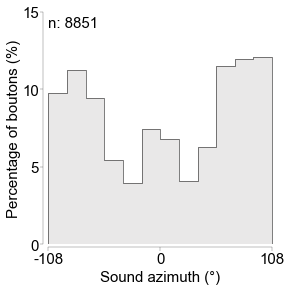

In [29]:
#Azimuth tuning distribuion for all boutons
fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100),constrained_layout =True)
ax = fig.add_subplot(1,1,1)
plotAzimuthDistribution(df0, peak0, fig, ax)

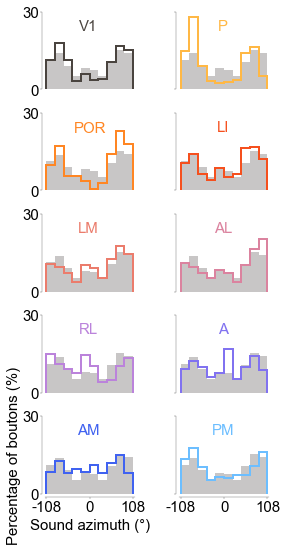

In [30]:
#Azimuth tuning distribution for boutons grouped by visual area
fig = plt.figure(figsize=(100*ops['mm'],200*ops['mm']), constrained_layout=False)
gs = gridspec.GridSpec(5, 2, figure=fig, hspace=0.3, wspace=0.5,left=0.16, right=0.95, bottom=0.1, top=0.95)
plotAzimuthDistribution_byArea(fig, gs, df, gaussFit,peak, ops)

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:10<00:00,  8.88it/s]


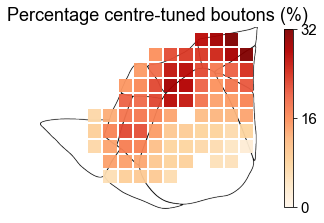

In [31]:
fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotProportionCentre_onMap(fig, ops['ref'], ops['ref2'], df0,ops,b=300)

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


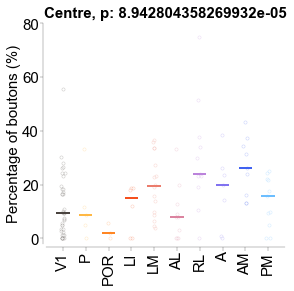

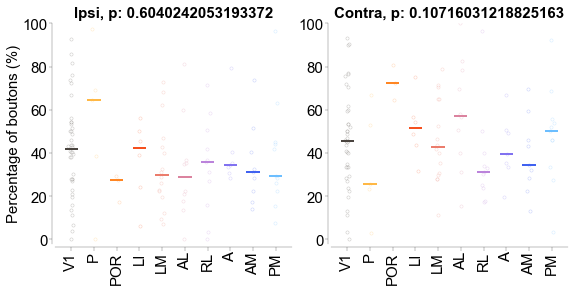

In [32]:
propCentre_byArea = plotProportionCentre_bySession(df, gaussFit,peak, eng, ops)

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\1444705761.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gaussFit['streamIdx'] = t


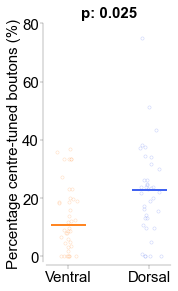

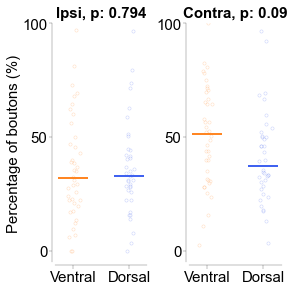

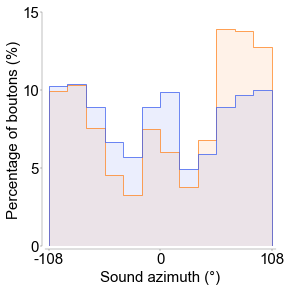

In [33]:
plotProportionCentre_byStream(fig, df,peak,gaussFit,eng,ops)

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\449802713.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['streamIdx'] = t
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


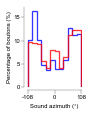

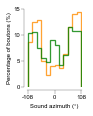

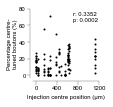

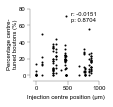

In [34]:
exploreInjectionLocation_azimuths(df0, peak0, ops,eng)

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:06<00:00, 12.03it/s]


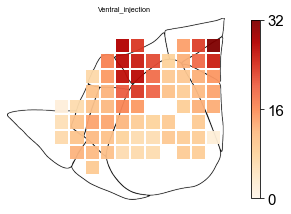

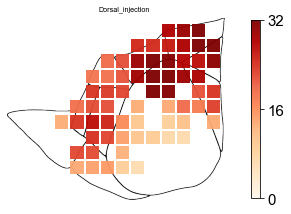

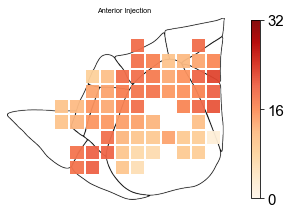

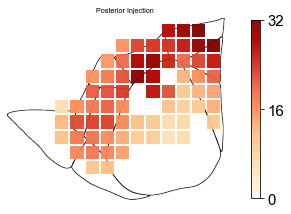

In [38]:
fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
ventral_idx =np.nonzero(np.array([df0['animal'].iloc[i] in ops['ventralAnimals'] for i in range(len(df0))]))[0]
plotProportionCentre_onMap(fig,ops['ref'], ops['ref2'], df0.iloc[ventral_idx],ops,b=300)
plt.title('Ventral_injection')
fig.savefig(os.path.join('Z:\\home\\shared\\Alex_analysis_camp\\paperFigures\\Plots\\ProportionCentre_onMap_ventral.svg'), dpi =300)

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
dorsal_idx =np.nonzero(np.array([df0['animal'].iloc[i] in ops['dorsalAnimals'] for i in range(len(df0))]))[0]
plotProportionCentre_onMap(fig, ops['ref'], ops['ref2'], df0.iloc[dorsal_idx],ops,b=300)
plt.title('Dorsal_injection')
fig.savefig(os.path.join('Z:\\home\\shared\\Alex_analysis_camp\\paperFigures\\Plots\\ProportionCentre_onMap_dorsal.svg'), dpi =300)

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
anterior_idx =np.nonzero(np.array([df0['animal'].iloc[i] in ops['anteriorAnimals'] for i in range(len(df0))]))[0]
plotProportionCentre_onMap(fig, ops['ref'], ops['ref2'], df0.iloc[anterior_idx],ops,b=300)
plt.title('Anterior Injection')
fig.savefig(os.path.join('Z:\\home\\shared\\Alex_analysis_camp\\paperFigures\\Plots\\ProportionCentre_onMap_anterior.svg'), dpi =300)

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
posterior_idx =np.nonzero(np.array([df0['animal'].iloc[i] in ops['posteriorAnimals'] for i in range(len(df0))]))[0]
plotProportionCentre_onMap(fig, ops['ref'], ops['ref2'], df0.iloc[posterior_idx],ops,b=300)
plt.title('Posterior Injection')
fig.savefig(os.path.join('Z:\\home\\shared\\Alex_analysis_camp\\paperFigures\\Plots\\ProportionCentre_onMap_posterior.svg'), dpi =300)


### Relationship with visual retinotopy

In [14]:
azi_peak_red_vis = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_neurons_final.csv'))
sel_red_vis_both = np.load(os.path.join(ops['dataPath'], 'locations_dataset', 'selective_red_vis_motorSub.npy'))
df_red_vis_sig = azi_peak_red_vis.iloc[sel_red_vis_both]
df_red = interpolateAzimuth_coliseum(df_red_vis_sig)

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3880300108.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['aziPeak'] = data_interp
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3880300108.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['elevPeak'] = data_interp


100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:07<00:00, 11.35it/s]


Text(0.5, 1.0, 'Visual azimuth, VC neurons')

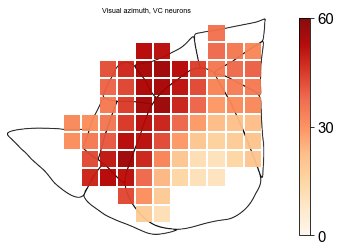

In [15]:
%run methods_Figure4.ipynb

# plotBestAzimuth_red_onMap(fig, df_red, ops['ref'], ops['ref2'],ops['map_V1'], b=300)
plotProportionCentre_onMap_red(fig,ax, ops['ref'], ops['ref2'],ops['map_V1'],df_red, ops,cmap='OrRd', b=300)
plt.title('Visual azimuth, VC neurons')

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\195251797.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_bySession_this_sh = np.array([peak_azi_bySession_sh[idx[i]] for i in range(len(idx))])


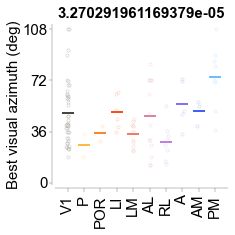

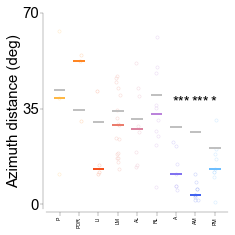

In [16]:
plotAzimuthDistance(df,peak,gaussFit, df_red, ops, eng,nShuffles=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:07<00:00, 11.41it/s]


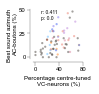

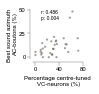

In [17]:
%run methods_Figure4.ipynb

#All VC
plotPropCentre_againstAzi_spatialBins(ops['ref'],ops['map_V1'],df0, df_red, ops,b=300,mask='none',propCentre_green=1, propCentre_red =1)

#V1 only
plotPropCentre_againstAzi_spatialBins(ops['ref'],ops['map_V1'],df0, df_red, ops,b=300,mask='V1',propCentre_green=1, propCentre_red =1)

100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:03<00:00, 25.54it/s]


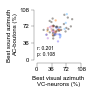

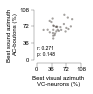

In [18]:
#All VC
plotPropCentre_againstAzi_spatialBins(ops['ref'],ops['map_V1'],df0, df_red, ops,b=300,mask='none',propCentre_green=0, propCentre_red =0)

#V1 only
plotPropCentre_againstAzi_spatialBins(ops['ref'],ops['map_V1'],df0, df_red, ops,b=300,mask='V1',propCentre_green=0, propCentre_red =0)

### Sound elevation tuning

In [19]:
df = azi_peak_green_aud_full.iloc[sel_green_aud_elev]
maps = maps_green_aud_motorSub[sel_green_aud_elev]
peak = np.array(df_fit['gaussian_peak'])[sel_green_aud_elev]

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3659703171.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_elev['elevPeak'] = elevPeak[includeIdx_green_elev]
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3659703171.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_bySession_this_sh = np.array([peak_elev_bySession

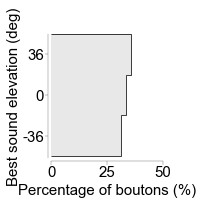

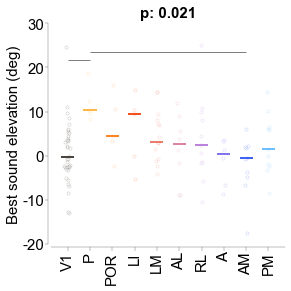

In [20]:
plotElevation_byArea(df,maps,peak,eng,ops, nShuffles=100)

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\1636430905.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_elev['elevPeak'] = elevPeak[includeIdx_green_elev]
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\1636430905.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['streamIdx'] = t


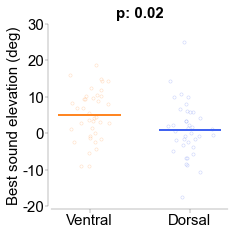

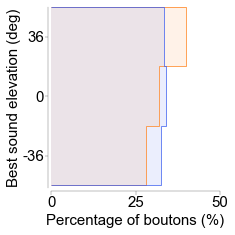

In [21]:
plotElevation_byStream(df, peak, maps, eng, ops)    

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\2415440937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak'] = elev
100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:09<00:00, 10.23it/s]


Text(0.5, 1.0, 'All animals')

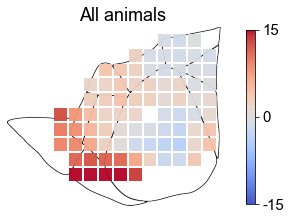

In [22]:
fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_onMap(fig, df, maps, peak,ops['ref'], ops['ref2'],ops['map_V1'], b=300)
plt.title('All animals')

100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:07<00:00, 11.28it/s]


Text(0.5, 1.0, 'Visual elevation, VC-neurons')

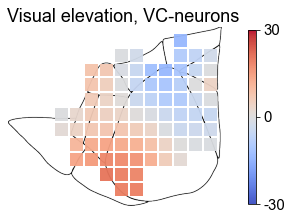

In [23]:
fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_red_onMap(fig, df_red, ops['ref'], ops['ref2'],ops['map_V1'], b=300)
plt.title('Visual elevation, VC-neurons')

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3779314777.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_elev['elevPeak'] = elevPeak[includeIdx_green_elev]
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\3779314777.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_bySession_this_sh = np.array([peak_elev_bySession_

3.9912993175862863
2.340522435608188
1.8692560984820117
2.7909667438981827
2.4064948240298767
1.6204997784078807
1.0
1.6392210028394247
1.386060864655528


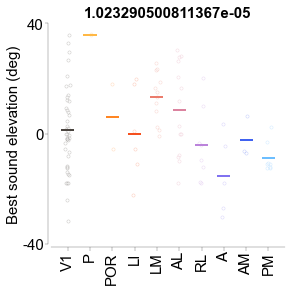

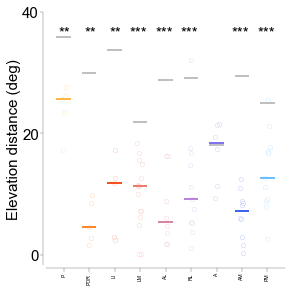

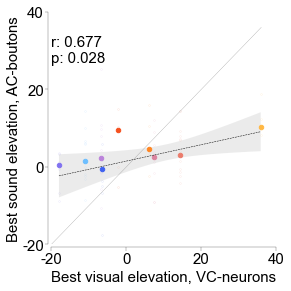

In [24]:
values_green_elev, values_red_elev = plotElevationDistance(df,maps,peak, df_red, ops, eng,nShuffles=1000)    

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\1882814040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak'] = elev
100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:07<00:00, 11.14it/s]


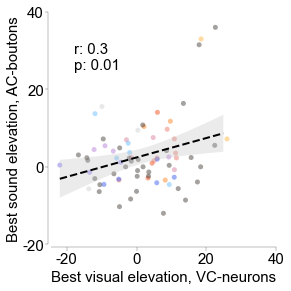

In [25]:
plotElevation_spatialBins_acrossMod(ops['ref'],df, maps, peak,df_red,ops, b=300, mask = 'none') #mask should be 'V1', 'HVAs' or none

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\365434240.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_elev['elevPeak'] = elevPeak[includeIdx_green_elev]
C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\365434240.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['streamIdx'] = t
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


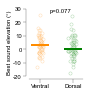

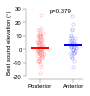

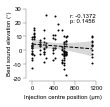

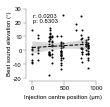

In [26]:
%run methods_Figure4.ipynb

exploreInjectionLocation_elevation(df, peak,maps, ops,eng)

C:\Users\egeaa\AppData\Local\Temp\2\ipykernel_4872\2415440937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak'] = elev
100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:05<00:00, 14.05it/s]


Text(0.5, 1.0, 'Posterior_injection')

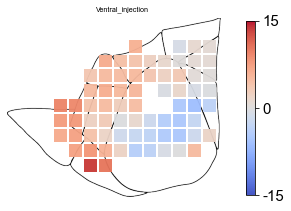

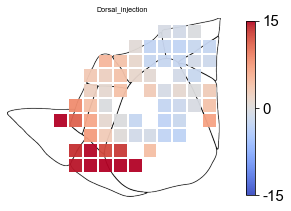

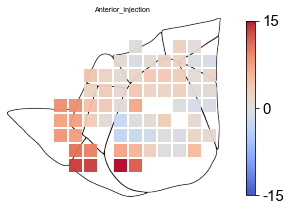

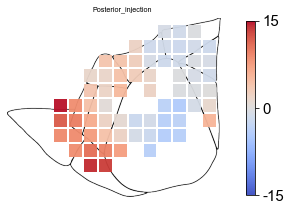

In [27]:
ventral_idx =np.nonzero(np.array([df['animal'].iloc[i] in ops['ventralAnimals'] for i in range(len(df))]))[0]
dorsal_idx =np.nonzero(np.array([df['animal'].iloc[i] in ops['dorsalAnimals'] for i in range(len(df))]))[0]
anterior_idx =np.nonzero(np.array([df['animal'].iloc[i] in ops['anteriorAnimals'] for i in range(len(df))]))[0]
posterior_idx =np.nonzero(np.array([df['animal'].iloc[i] in ops['posteriorAnimals'] for i in range(len(df))]))[0]

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_onMap(fig, df.iloc[ventral_idx], maps[ventral_idx], peak[ventral_idx], ops['ref'], ops['ref2'],ops['map_V1'],b=300)
plt.title('Ventral_injection')

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_onMap(fig, df.iloc[dorsal_idx], maps[dorsal_idx], peak[dorsal_idx], ops['ref'], ops['ref2'],ops['map_V1'],b=300)
plt.title('Dorsal_injection')

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_onMap(fig, df.iloc[anterior_idx], maps[anterior_idx], peak[anterior_idx], ops['ref'], ops['ref2'],ops['map_V1'],b=300)
plt.title('Anterior_injection')

fig = plt.figure(figsize=(ops['mm']*100, ops['mm']*100), constrained_layout=True)       
plotBestElevation_onMap(fig, df.iloc[posterior_idx], maps[posterior_idx], peak[posterior_idx], ops['ref'], ops['ref2'],ops['map_V1'],b=300)
plt.title('Posterior_injection')
